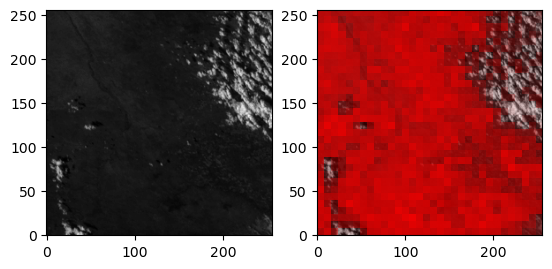

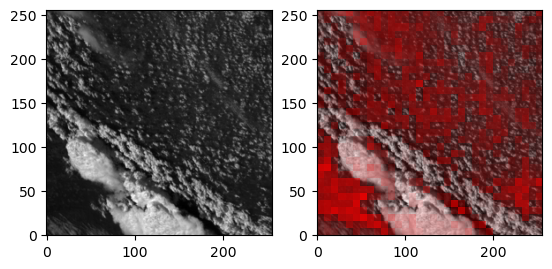

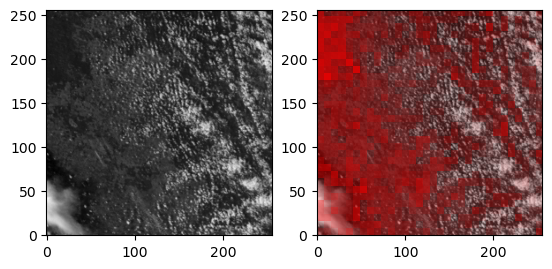

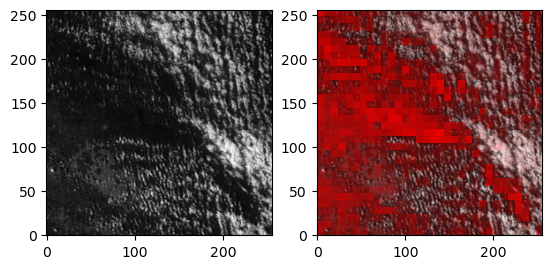

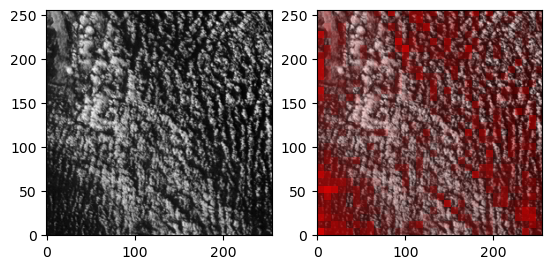

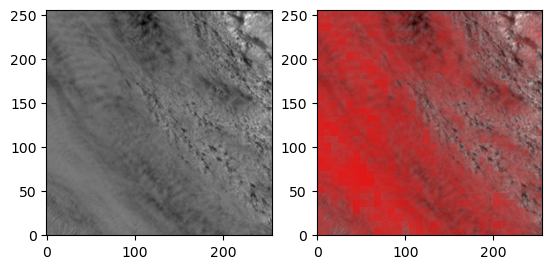

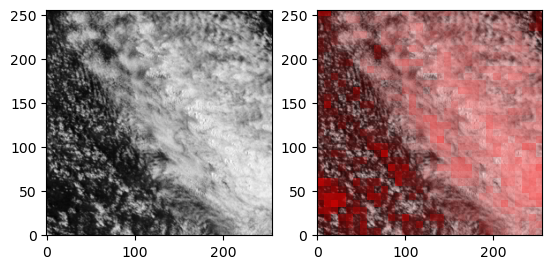

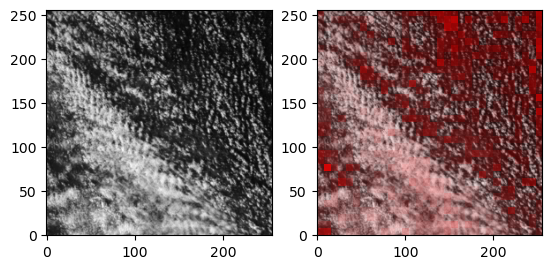

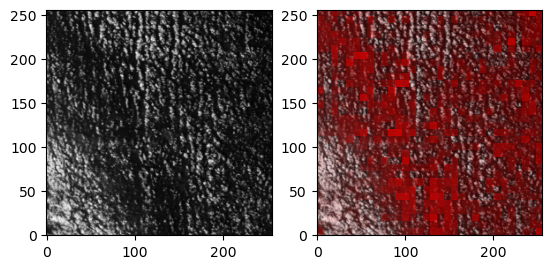

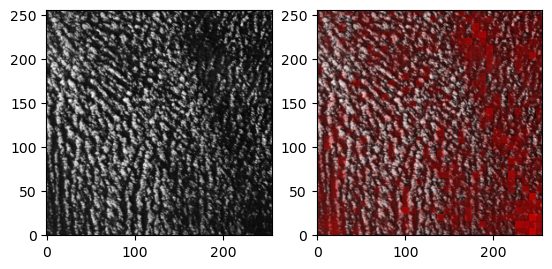

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import axes
from skimage.feature import graycomatrix, graycoprops

# Input number of convection files and tile size
num = 204
num1 = 0
num2 = 10
tile_size = 8
num_rows = int(256/tile_size)
num_cols = int(256/tile_size)
num_tiles = int(num_rows * num_cols)

# Get sample image from Convection data
x_train_vis = np.zeros((num,256,256,9), dtype='float32')
f = open('/Users/kristinamoen/Library/CloudStorage/Dropbox/Math/Colorado State University/CIRA/Convection/20190523_seg_mrms_256_comp_real.bin','rb')
data = np.fromfile(f,dtype='float32')

for j in range(num1, num2):
        x_train_vis[j,:,:,:] = np.reshape(data[(j*(692224)):(j*(692224)+589824)],(256,256,9))

for n in range(num1, num2):
    isamp = n
    data = x_train_vis[isamp,:,:,0]
    data *= 100
    data=data.astype(np.uint8)
    tiles = []
    glcms = []
    contrast_value = []
    contrast_values = []
    correlation_values = []
    energy_values = []
    homogeneity_values = []
    for r in range(0, 256, tile_size):
        for c in range(0, 256, tile_size):
            tile = data[r:r+tile_size, c:c+tile_size]
            tiles.append(tile)
            distances=[1]
            angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
            glcm0 = graycomatrix(tile, distances=distances, angles=[0], levels=256, symmetric=False)
            glcm1 = graycomatrix(tile, distances=distances, angles=[np.pi/4], levels=256, symmetric=False)
            glcm2 = graycomatrix(tile, distances=distances, angles=[np.pi/2], levels=256, symmetric=False)
            glcm3 = graycomatrix(tile, distances=distances, angles=[3 * np.pi/4], levels=256, symmetric=False)
            glcm=(glcm0 + glcm1 + glcm2 + glcm3)/4 #compute mean matrix
            glcms.append(glcm)
            contrast = (float(graycoprops(glcm, 'contrast')))
            correlation = float(graycoprops(glcm, 'correlation'))
            energy = float(graycoprops(glcm, 'energy'))
            homogeneity = float(graycoprops(glcm, 'homogeneity'))
            contrast_value.append(contrast)
            correlation_values.append(correlation)
            energy_values.append(energy)
            homogeneity_values.append(homogeneity)
    contrast_max=max(contrast_value)
    for val in contrast_value:
        contrast_values.append(val/contrast_max)
    feature = 'homogeneity'
    feature_values =  homogeneity_values
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(data, cmap='gray', origin='lower')
    plt.xlim(0,256)
    plt.ylim(0,256)
    plt.axis('scaled')
    #plt.title(isamp)
    ax[1].imshow(data, cmap='gray', origin='lower')
    plt.xlim(0,256)
    plt.ylim(0,256)
    plt.axis('scaled')
    for r in range (0, 256, tile_size):
        for c in range (0, 256, tile_size):
            x_offset = c
            y_offset = r
            rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='red', edgecolor='none', alpha=feature_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
            ax[1].add_patch(rect)

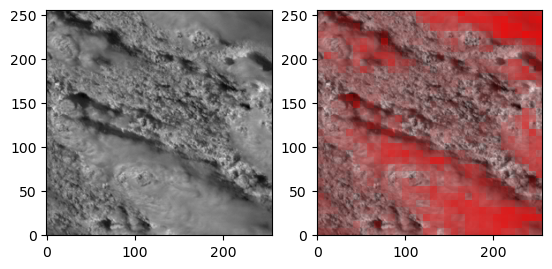

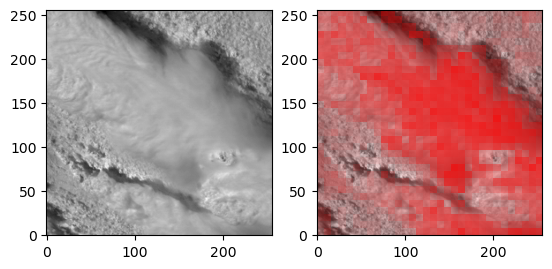

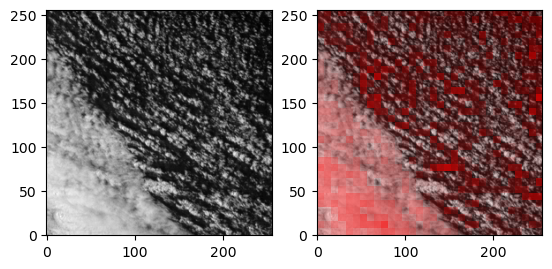

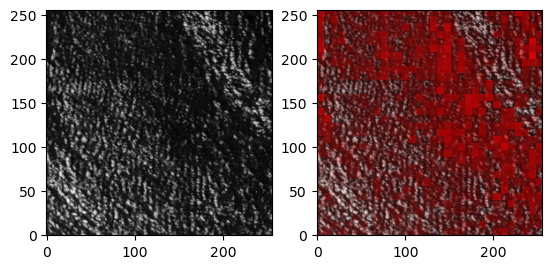

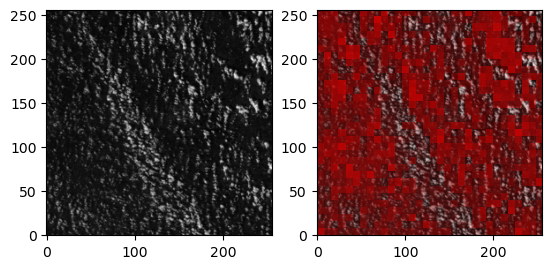

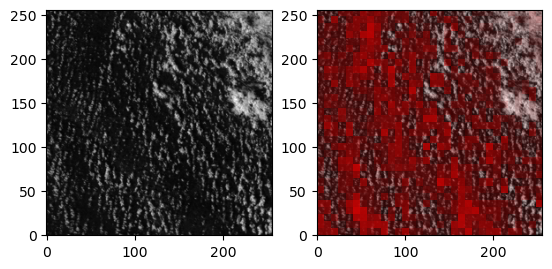

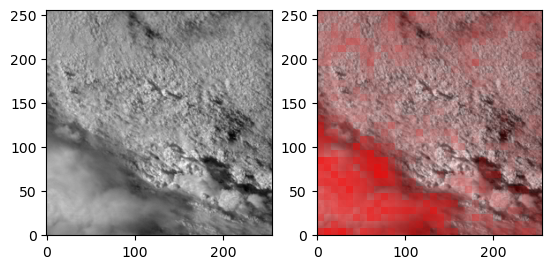

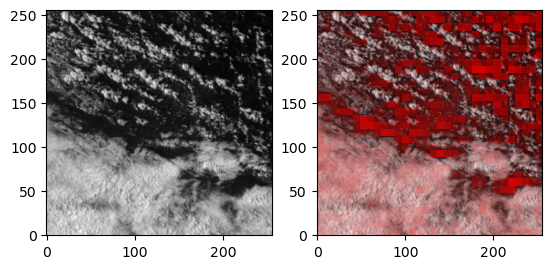

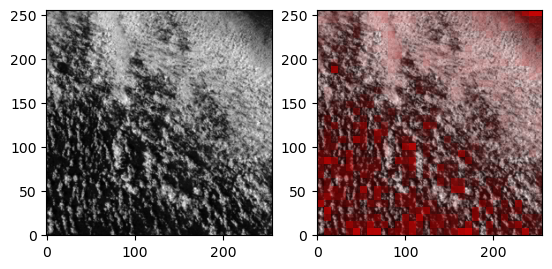

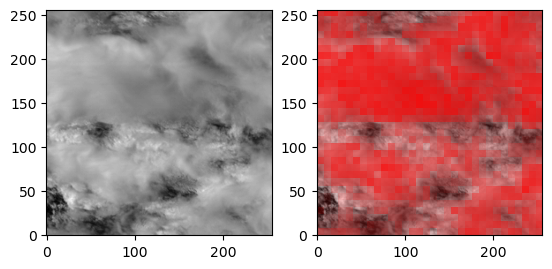

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import axes
from skimage.feature import graycomatrix, graycoprops

# Input number of convection files and tile size
num = 204
num1 = 10
num2 = 20
tile_size = 8
num_rows = int(256/tile_size)
num_cols = int(256/tile_size)
num_tiles = int(num_rows * num_cols)

# Get sample image from Convection data
x_train_vis = np.zeros((num,256,256,9), dtype='float32')
f = open('/Users/kristinamoen/Library/CloudStorage/Dropbox/Math/Colorado State University/CIRA/Convection/20190523_seg_mrms_256_comp_real.bin','rb')
data = np.fromfile(f,dtype='float32')

for j in range(num1, num2):
        x_train_vis[j,:,:,:] = np.reshape(data[(j*(692224)):(j*(692224)+589824)],(256,256,9))

for n in range(num1, num2):
    isamp = n
    data = x_train_vis[isamp,:,:,0]
    data *= 100
    data=data.astype(np.uint8)
    tiles = []
    glcms = []
    contrast_value = []
    contrast_values = []
    correlation_values = []
    energy_values = []
    homogeneity_values = []
    for r in range(0, 256, tile_size):
        for c in range(0, 256, tile_size):
            tile = data[r:r+tile_size, c:c+tile_size]
            tiles.append(tile)
            distances=[1]
            angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
            glcm0 = graycomatrix(tile, distances=distances, angles=[0], levels=256, symmetric=False)
            glcm1 = graycomatrix(tile, distances=distances, angles=[np.pi/4], levels=256, symmetric=False)
            glcm2 = graycomatrix(tile, distances=distances, angles=[np.pi/2], levels=256, symmetric=False)
            glcm3 = graycomatrix(tile, distances=distances, angles=[3 * np.pi/4], levels=256, symmetric=False)
            glcm=(glcm0 + glcm1 + glcm2 + glcm3)/4 #compute mean matrix
            glcms.append(glcm)
            contrast = (float(graycoprops(glcm, 'contrast')))
            correlation = float(graycoprops(glcm, 'correlation'))
            energy = float(graycoprops(glcm, 'energy'))
            homogeneity = float(graycoprops(glcm, 'homogeneity'))
            contrast_value.append(contrast)
            correlation_values.append(correlation)
            energy_values.append(energy)
            homogeneity_values.append(homogeneity)
    contrast_max=max(contrast_value)
    for val in contrast_value:
        contrast_values.append(val/contrast_max)
    feature = 'homogeneity'
    feature_values =  homogeneity_values
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(data, cmap='gray', origin='lower')
    plt.xlim(0,256)
    plt.ylim(0,256)
    plt.axis('scaled')
    #plt.title(isamp)
    ax[1].imshow(data, cmap='gray', origin='lower')
    plt.xlim(0,256)
    plt.ylim(0,256)
    plt.axis('scaled')
    for r in range (0, 256, tile_size):
        for c in range (0, 256, tile_size):
            x_offset = c
            y_offset = r
            rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='red', edgecolor='none', alpha=feature_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
            ax[1].add_patch(rect)